In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


#### Firstly, enter the paths of the corresonding input files in the code cell below.
- You only need to change the name of the subreddit (reddit_name)

In [2]:
reddit_name = "europeanunion"

CASH_PATH = "C:/Users/peapo/DataSci_Project/DataScienceProject"
MERT_PATH = "/Users/merterol/Desktop/UZH/CompLing:CompSci/CompSci/Sem2/ESC403/ESC403_Project/DataScienceProject"
MERT_MUSEUM ="/Users/merterol/Desktop/DataScience Project/DataScienceProject"
# CHANGE THIS
OWNER_PATH = MERT_MUSEUM
#

POSTS = f"{OWNER_PATH}/cleaned jsons/cleaned/{reddit_name}_submissions_csv_cleaned.csv"

SENTIMENTS = f"{OWNER_PATH}/sentiment/sentiment_{reddit_name}_comments_cleaned_pretty.json"
CLEANED = f"{OWNER_PATH}/raw data/pretty jsons/{reddit_name}_comments_cleaned_pretty.json"

OUTPUT_SENT = f"{OWNER_PATH}/visuals/df_csv/{reddit_name}_df_sent.csv"
OUTPUT_CLEANED = f"{OWNER_PATH}/visuals/df_csv/{reddit_name}_df_cleaned.csv"

MERGED = f"{OWNER_PATH}/visuals/df_csv/{reddit_name}_df_merged.csv"

# Important:

- This script is designed in a way that if the paths above are set correctly, it can be ran all the way to the end.
- If the paths are not set correctly, the script might behave very differently than expected.
- MAKE SURE TO SET THE PATHS CORRECTLY.

# Conversion

#### Converting the input files to the required format and then merging them into a single file that can be used for manipulation and visualization

#### JSON to CSV converter

In [3]:
with open(SENTIMENTS, "r") as file:
    data = json.load(file)

df = pd.DataFrame(list(data.items()), columns=["Date", "Text"])

df[["Polarity", "Subjectivity"]] = df["Text"].apply(pd.Series)

df.drop(columns=["Text"], inplace = True)

df.to_csv(OUTPUT_SENT, index=False)

In [4]:
with open(CLEANED, "r") as file:
    data = json.load(file)

df = pd.DataFrame(list(data.items()), columns=["Date", "Text"])

df["Text"] = df["Text"].str.replace("[^\w\s]", "", regex=True)
df["Text"] = df["Text"].str.replace("\n", " ", regex=True)
df["Text"] = df["Text"].str.replace("\r", " ", regex=True)

df.to_csv(OUTPUT_CLEANED, index=False)


#### Combining the two newly generated csv files on their common column

In [5]:

def merge_posts_and_comments(df_posts,dfcomments,output):

    df_new = pd.DataFrame(data={
        "Date": pd.to_datetime(df_posts.timestamp),
#        "Text": df_posts["title"] + " | " + df_posts["selftext"],
        "Polarity": (df_posts.title_polarity + df_posts.text_polarity) * 0.5,
        "Subjectivity": (df_posts.title_subjectivity + df_posts.text_subjectivity) * 0.5,
    })

    df_new["Text"] = df_posts.apply(lambda row: str(row["title"])+ " | "+ str(row["selftext"]), axis=1)

    dfcomments["Date"] = pd.to_datetime(dfcomments["Date"])


    print(df_new.head())
#    dfcomments.set_index("Date", inplace=True)
#    df_new.set_index("Date",inplace=True)

    df_merged = pd.concat([df_new, dfcomments],ignore_index=True,axis=0)

#    df_merged.set_index("Date",inplace=True)

    df_merged.to_csv(output, index=False)

    return df_merged

df_sent = pd.read_csv(OUTPUT_SENT)
df_cleaned = pd.read_csv(OUTPUT_CLEANED)

df_posts = pd.read_csv(POSTS)

df_merged = pd.merge(df_cleaned, df_sent, on="Date", how="inner")
df_merged.to_csv(MERGED, index=False)


merge_posts_and_comments(df_posts, df_merged, MERGED)


                 Date  Polarity  Subjectivity  \
0 2017-03-29 18:18:23  0.000000       0.00000   
1 2017-04-01 11:02:31 -0.187500       0.60000   
2 2017-04-27 10:50:51  0.104156       0.44191   
3 2017-06-07 15:04:00  0.000000       0.00000   
4 2017-06-07 15:43:05  0.300000       0.50000   

                                                Text  
0       Scandinavia Is Not A Socialist Triumph | nan  
1  Your flag is getting fucked up in the Place. R...  
2  Verhofstadt's speech about Hungary: reaction a...  
3  European Commission - A European Defence Fund:...  
4  Europe Must Take Its Defense Into Its Own Hand...  


,Date,Polarity,Subjectivity,Text
0,2017-03-29 18:18:23,0.000000,0.000000,Scandinavia Is Not A Socialist Triumph | nan
1,2017-04-01 11:02:31,-0.187500,0.600000,Your flag is getting fucked up in the Place. R...
2,2017-04-27 10:50:51,0.104156,0.441910,Verhofstadt's speech about Hungary: reaction a...
3,2017-06-07 15:04:00,0.000000,0.000000,European Commission - A European Defence Fund:...
4,2017-06-07 15:43:05,0.300000,0.500000,Europe Must Take Its Defense Into Its Own Hand...
...,...,...,...,...
39985,2022-12-31 18:52:20,0.184722,0.518056,So the workers suffer to keep inflation in che...
39986,2022-12-31 19:56:41,0.000000,0.000000,Second
39987,2022-12-31 20:25:03,-0.195000,0.510000,Thats a very negative view of the EU Lots is p...
39988,2022-12-31 21:29:56,-0.400000,0.600000,The poor get boned again


# Start of DataFrame manipulation

In [6]:
df = pd.read_csv(MERGED)
df = df.sort_values(by="Date")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.head()

,Polarity,Subjectivity,Text
Date,,,
2014-11-11 18:07:50,0.222917,0.358333,Hi we felt like we could share our factchecks ...
2014-11-11 20:38:09,0.232727,0.601616,Sure thats not really a problem on reuropeanun...
2014-11-13 09:55:03,0.267857,0.367857,Right will do do Thanks
2014-11-20 20:38:55,0.038889,0.463889,what a blow out of proportion full of irreleva...
2015-01-10 16:21:26,0.071726,0.354464,gtBut none of their resolutions are debated by...


### EDA

In [7]:
print("DataFrame Description")
print(df.describe())

print("\nisnull sum:")
print(df.isnull().sum())
print("\nDtypes in DataFrame")
print(df.dtypes)


DataFrame Description
           Polarity  Subjectivity
count  39990.000000  39990.000000
mean       0.063983      0.321269
std        0.221995      0.283479
min       -1.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.328727
75%        0.149372      0.512963
max        1.000000      1.000000

isnull sum:
Polarity         0
Subjectivity     0
Text            52
dtype: int64

Dtypes in DataFrame
Polarity        float64
Subjectivity    float64
Text             object
dtype: object


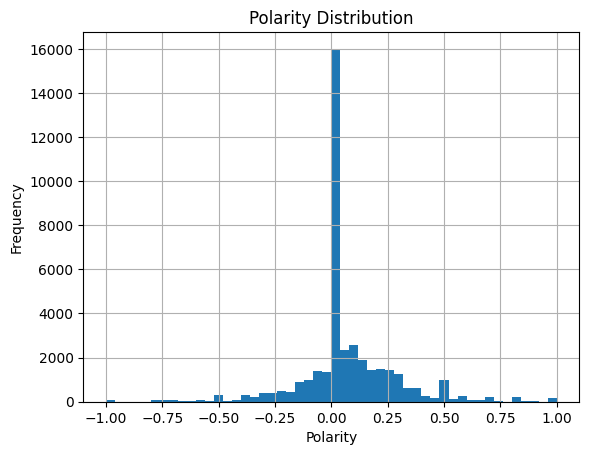

In [8]:
df["Polarity"].hist(bins=50)
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

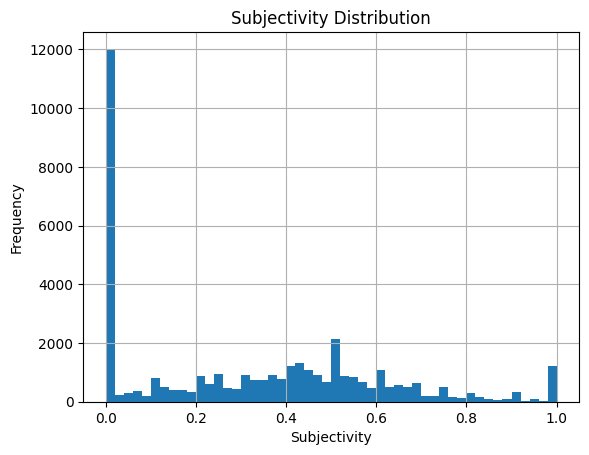

In [9]:
df["Subjectivity"].hist(bins=50)
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

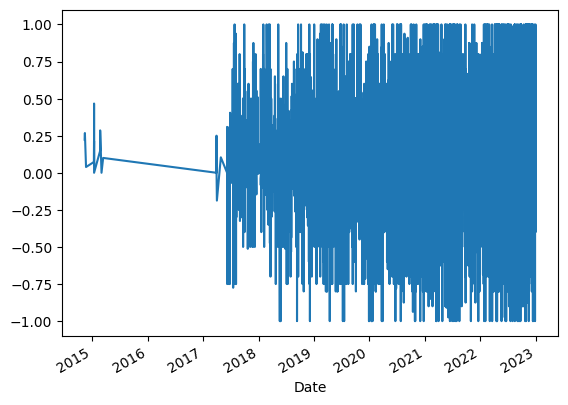

In [10]:
df["Polarity"].plot()
plt.show()

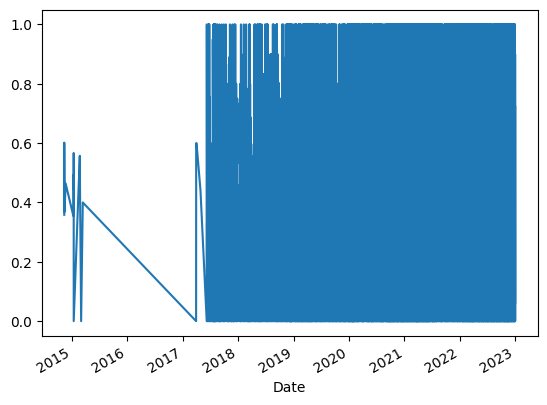

In [11]:
df["Subjectivity"].plot()
plt.show()

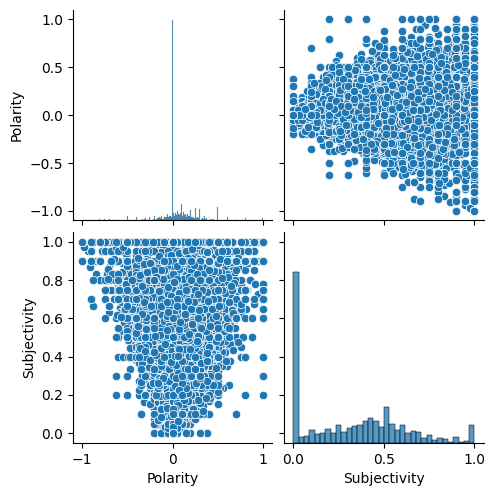

In [12]:
plt.figsize=(15, 10)
sns.pairplot(df)
plt.show()

## Detailed Graphs

In [13]:
df["Year"] = df.index.year
df["Month"] = df.index.month

# Create pivot tables for each attribute
polarity_pivot = df.pivot_table(values="Polarity", index="Month", columns="Year", aggfunc="mean", fill_value=0)
subjectivity_pivot = df.pivot_table(values="Subjectivity", index="Month", columns="Year", aggfunc="mean", fill_value=0)

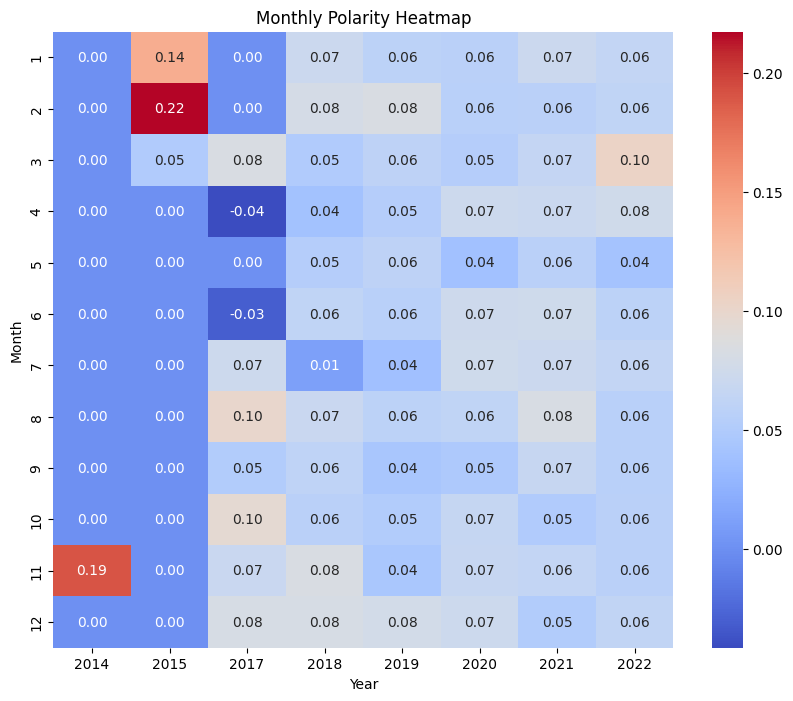

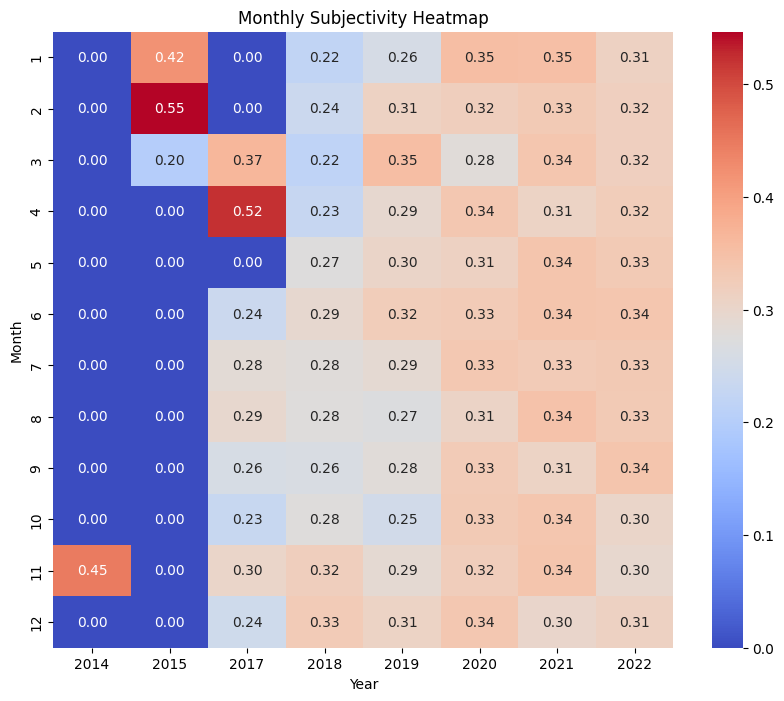

In [14]:

# Heatmap for Polarity
plt.figure(figsize=(10, 8))
sns.heatmap(polarity_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Polarity Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

# Heatmap for Subjectivity
plt.figure(figsize=(10, 8))
sns.heatmap(subjectivity_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Subjectivity Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

Getting Sentiment Distributions

In [15]:
# creating new column to categorize the sentiment
df["Sentiment"] = df["Polarity"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))
df.head()

,Polarity,Subjectivity,Text,Year,Month,Sentiment
Date,,,,,,
2014-11-11 18:07:50,0.222917,0.358333,Hi we felt like we could share our factchecks ...,2014,11,Positive
2014-11-11 20:38:09,0.232727,0.601616,Sure thats not really a problem on reuropeanun...,2014,11,Positive
2014-11-13 09:55:03,0.267857,0.367857,Right will do do Thanks,2014,11,Positive
2014-11-20 20:38:55,0.038889,0.463889,what a blow out of proportion full of irreleva...,2014,11,Positive
2015-01-10 16:21:26,0.071726,0.354464,gtBut none of their resolutions are debated by...,2015,1,Positive


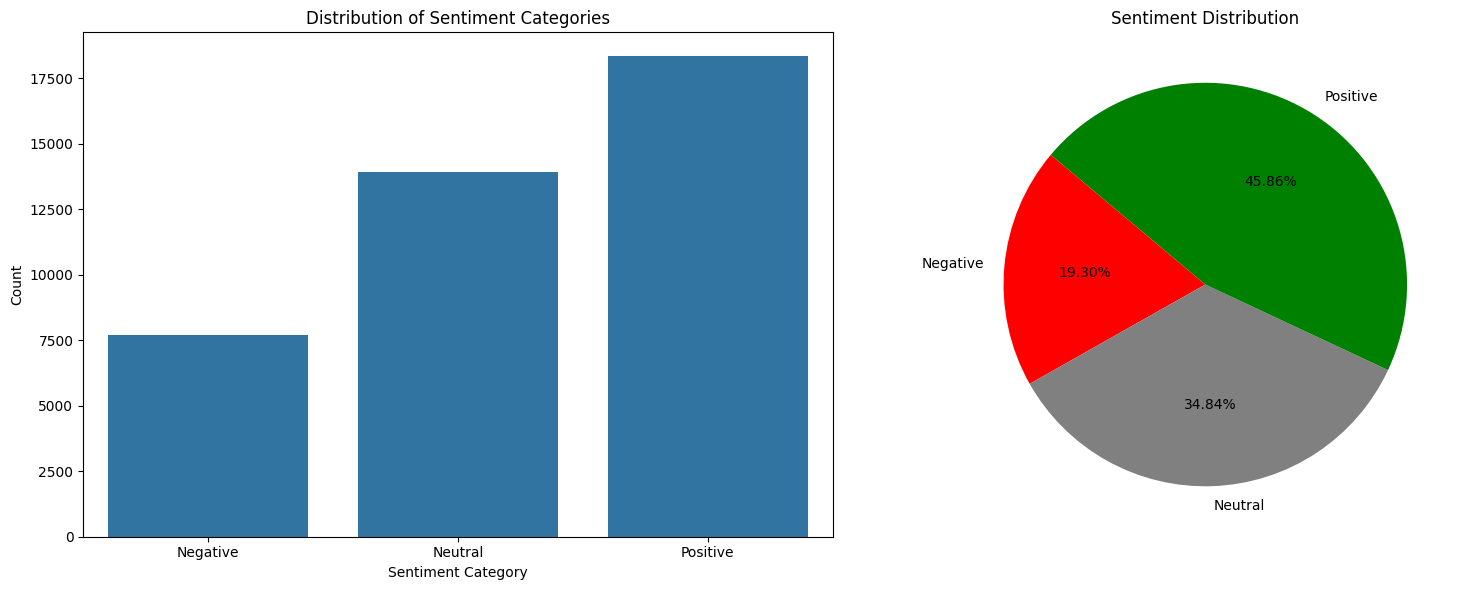

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x="Sentiment", data=df, order=["Negative", "Neutral", "Positive"], ax=ax1)
ax1.set_title("Distribution of Sentiment Categories")
ax1.set_xlabel("Sentiment Category")
ax1.set_ylabel("Count")

sentiment_counts = df["Sentiment"].value_counts()[["Negative", "Neutral", "Positive"]]

ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.2f%%", startangle=140, colors=["red", "grey", "green"])
ax2.set_title("Sentiment Distribution")

plt.tight_layout()
plt.show()


#### Sentiment Distro overall

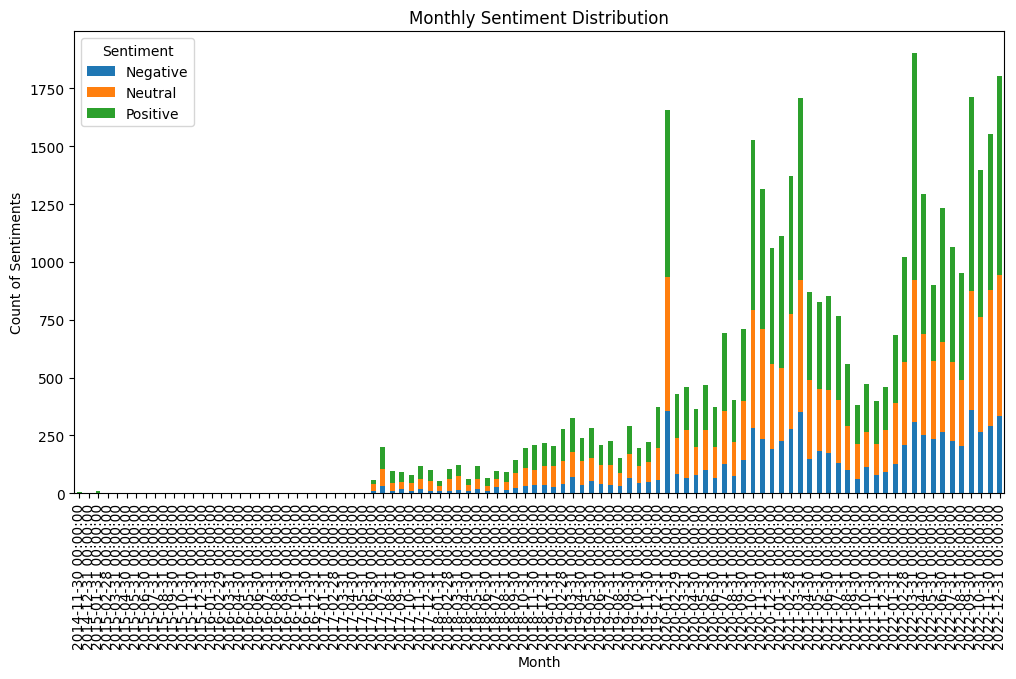

In [17]:
monthly_sentiment = df.groupby(["Sentiment"]).resample("M").size().unstack(0).fillna(0)

monthly_sentiment.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Count of Sentiments")
plt.legend(title="Sentiment")
plt.show()

#### Going into more detail each year

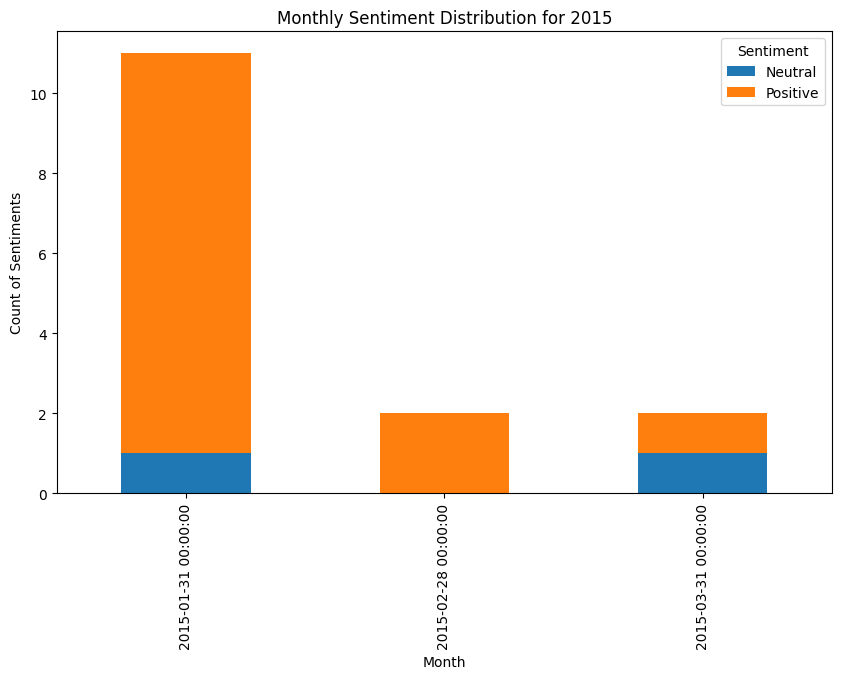

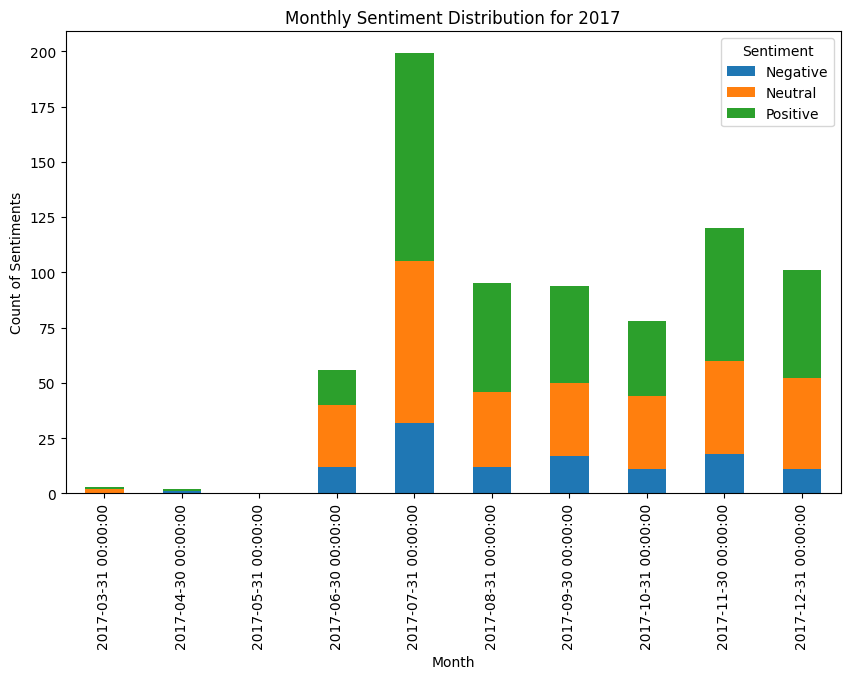

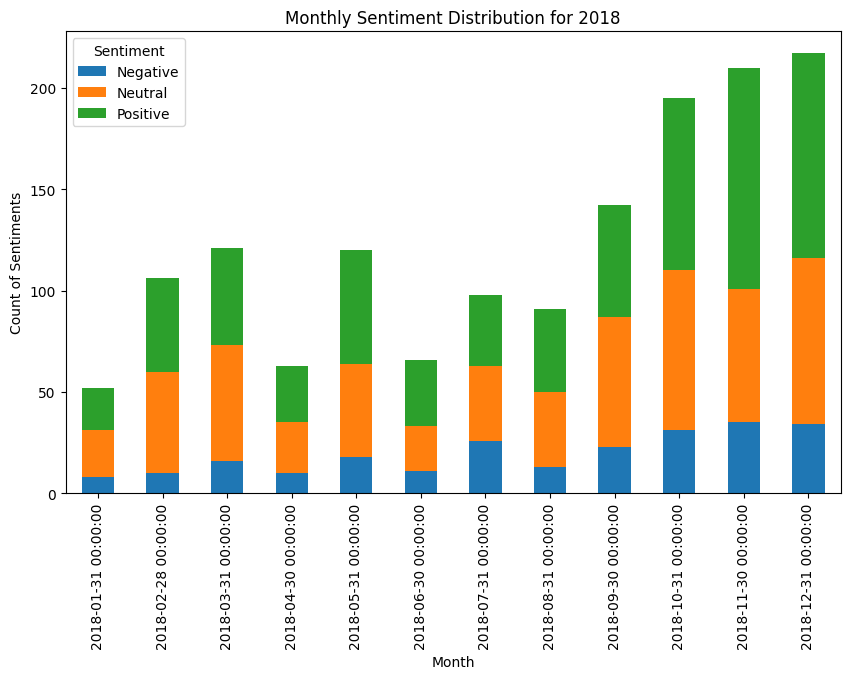

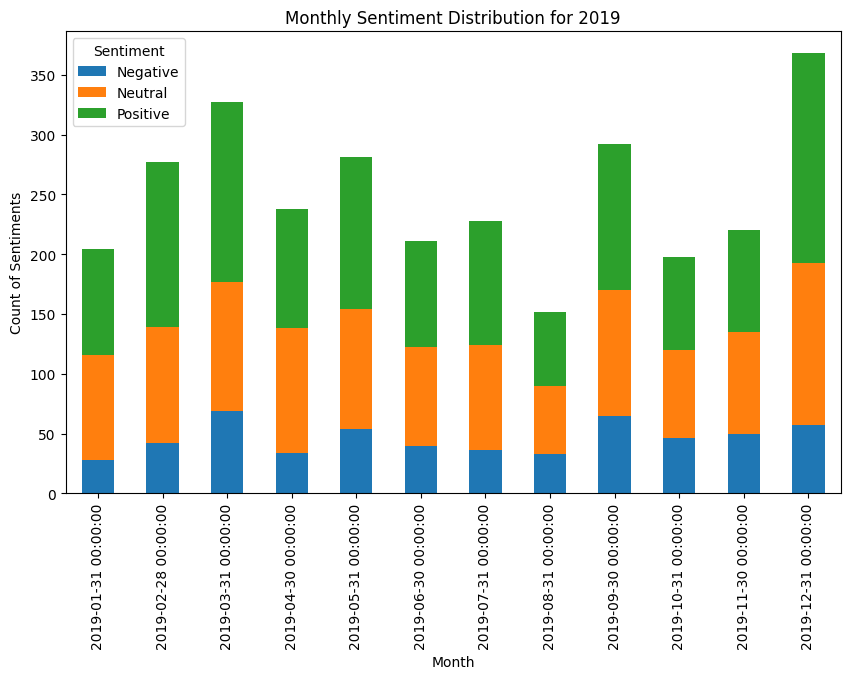

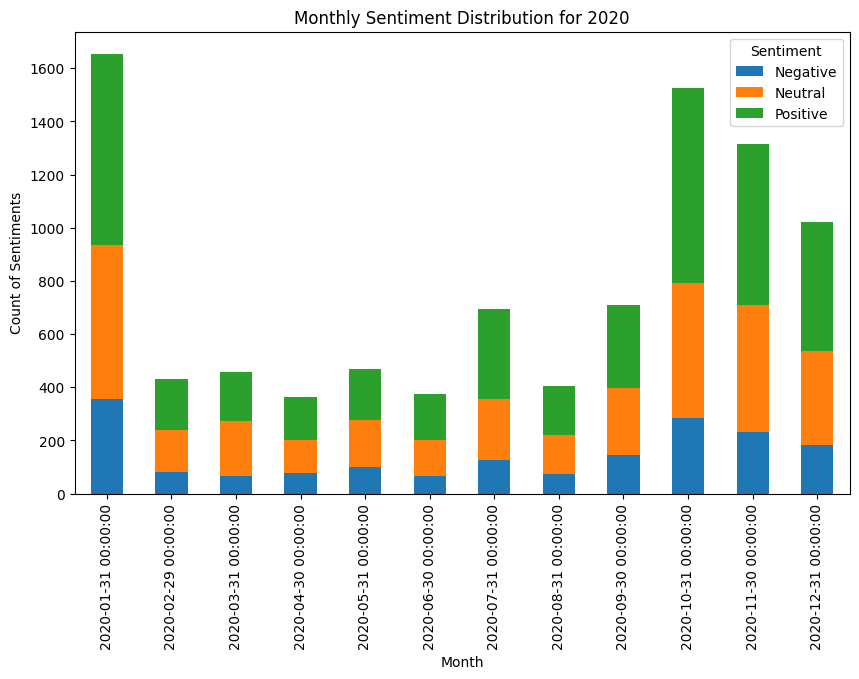

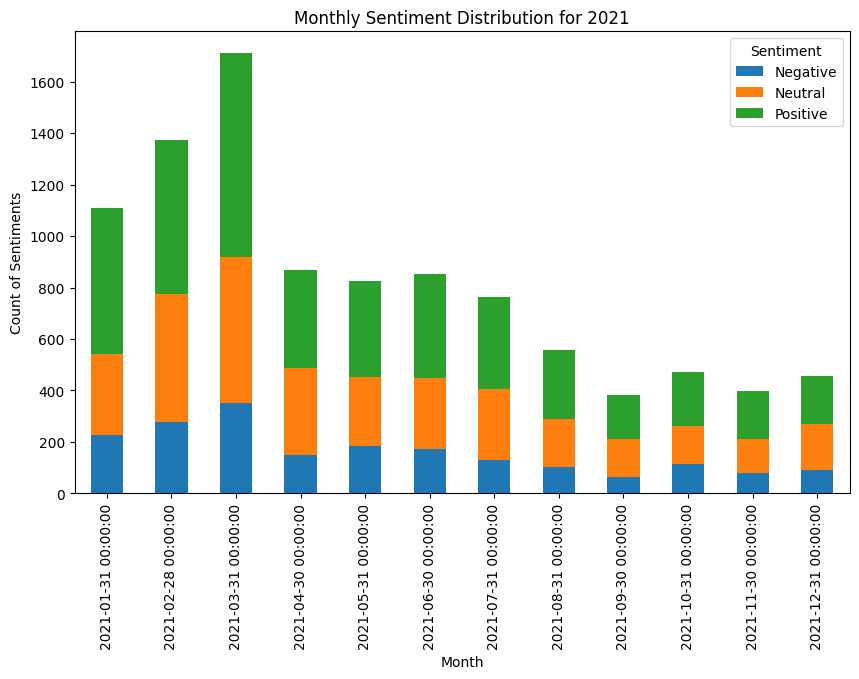

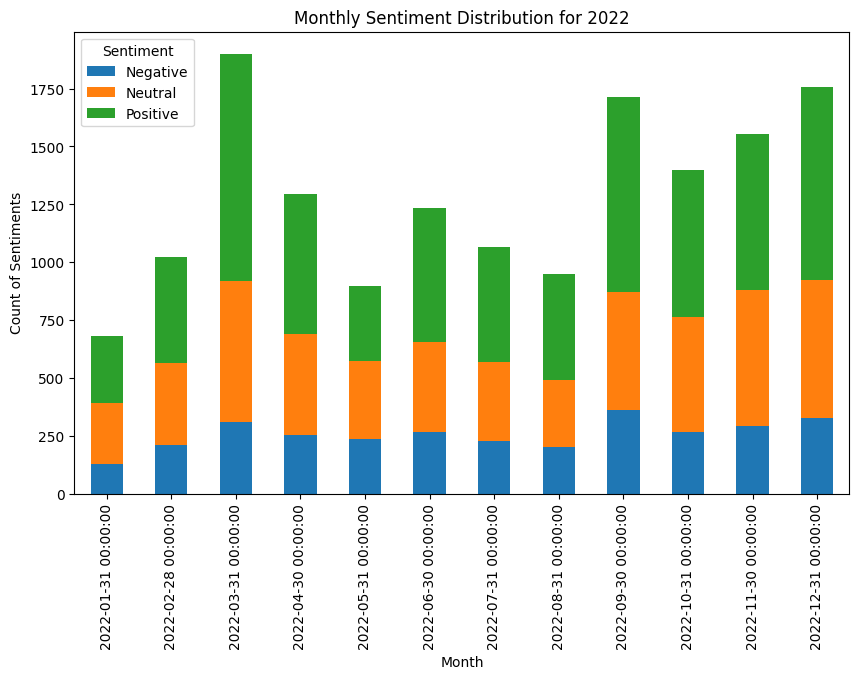

In [18]:
df.sort_index(inplace=True)
years = df.index.year.unique()

for year in years:
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)

    if start_date >= df.index.min() and end_date <= df.index.max():
        yearly_data = df[start_date:end_date]
        
        if not yearly_data.empty:
            monthly_sentiment = yearly_data.groupby("Sentiment").resample("M").size().unstack(0).fillna(0)
            
            monthly_sentiment.plot(kind="bar", stacked=True, figsize=(10, 6))
            plt.title(f"Monthly Sentiment Distribution for {year}")
            plt.xlabel("Month")
            plt.ylabel("Count of Sentiments")
            plt.legend(title="Sentiment")
            plt.show()

## Wordclouds

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
positive_texts = df[df["Sentiment"] == "Positive"]["Text"].dropna()
negative_texts = df[df["Sentiment"] == "Negative"]["Text"].dropna()

positive_text = " ".join(text for text in positive_texts)
negative_text = " ".join(text for text in negative_texts)

stopwords = set(STOPWORDS)
stopwords.update([])

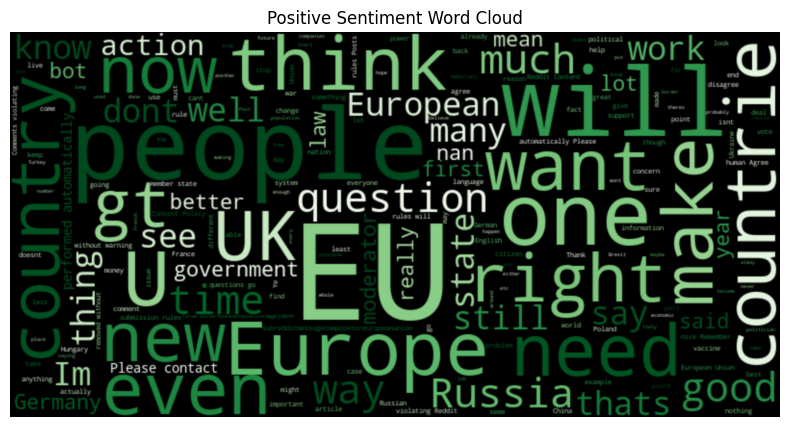

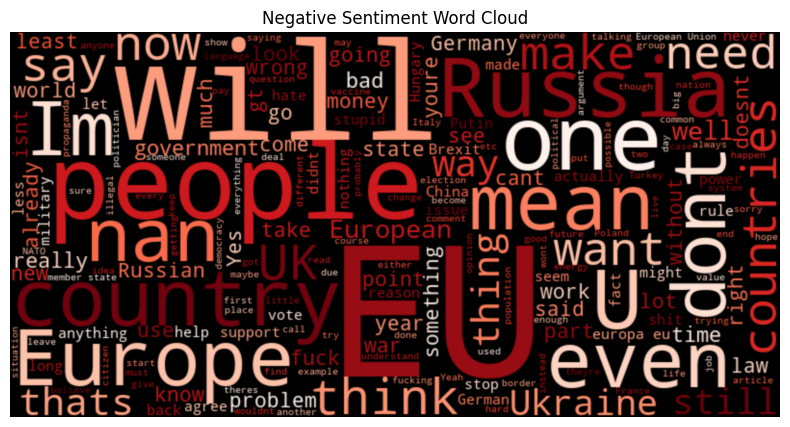

In [21]:
def create_wordcloud(text, title, colormap="viridis"):
    wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=stopwords, colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bicubic")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(positive_text, "Positive Sentiment Word Cloud", colormap="Greens")
create_wordcloud(negative_text, "Negative Sentiment Word Cloud", colormap="Reds")